In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('./house_rental_data.csv')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
df.shape

(645, 8)

In [3]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(645, 7)

In [8]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


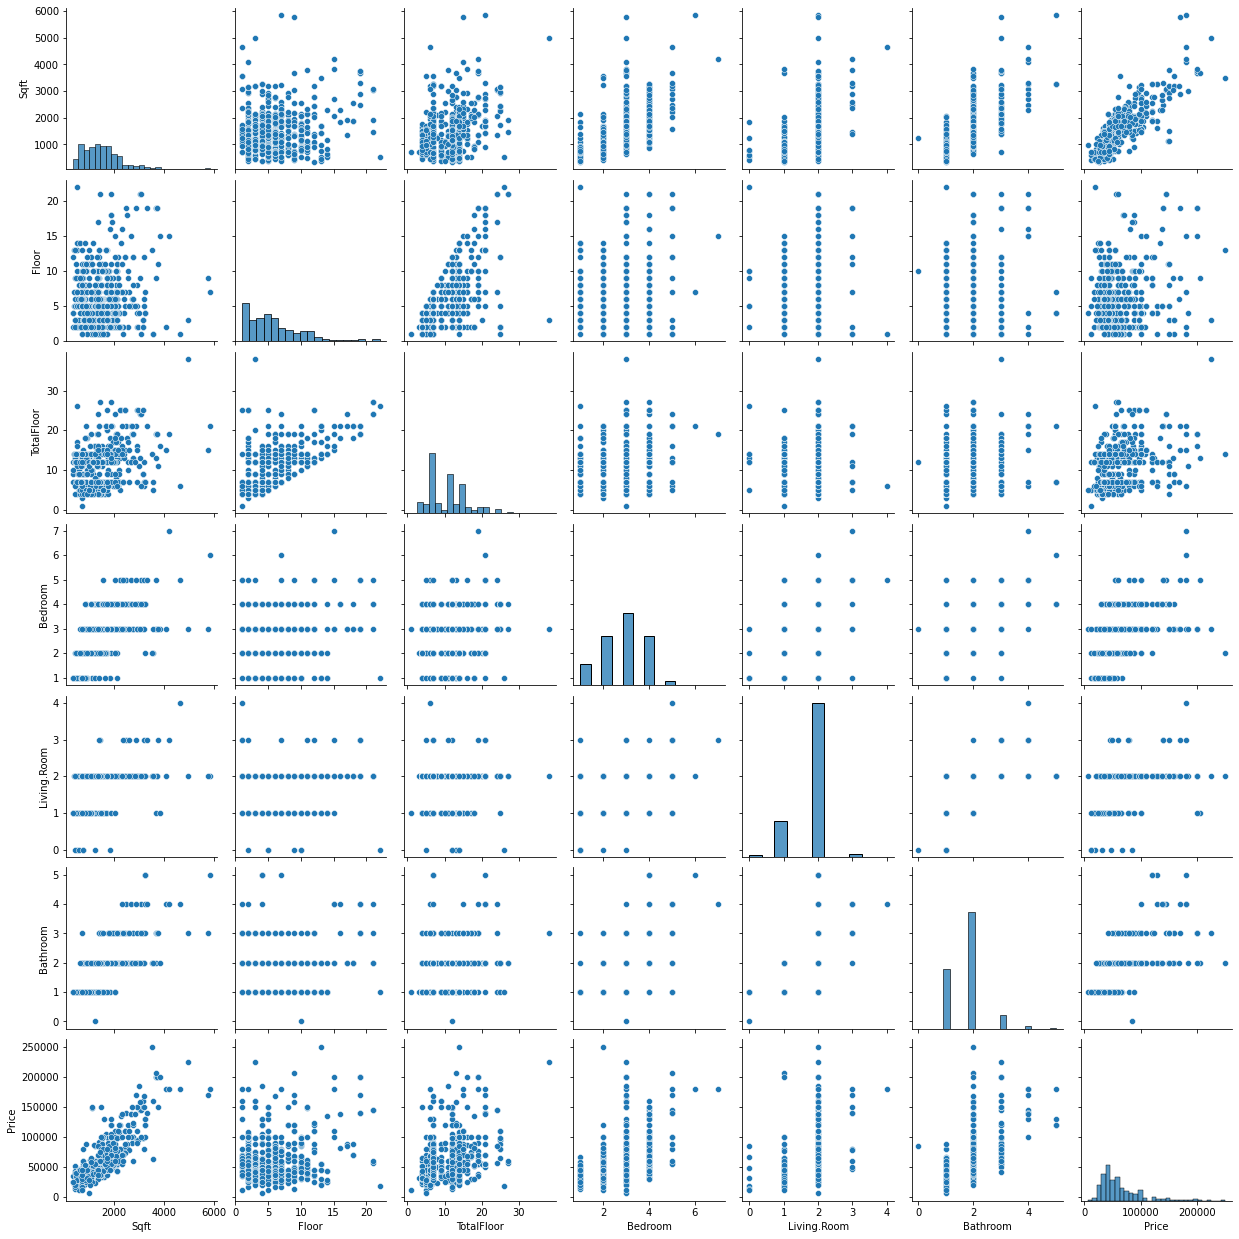

In [9]:
sns.pairplot(df)

<AxesSubplot:>

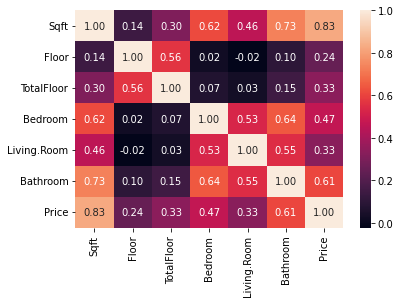

In [10]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

<AxesSubplot:xlabel='Sqft', ylabel='Count'>

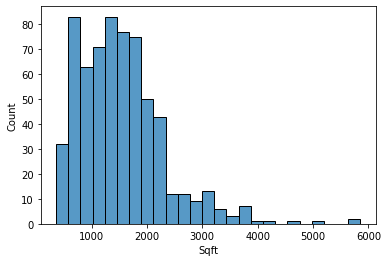

In [11]:
sns.histplot(df['Sqft'])

<AxesSubplot:xlabel='Floor', ylabel='Count'>

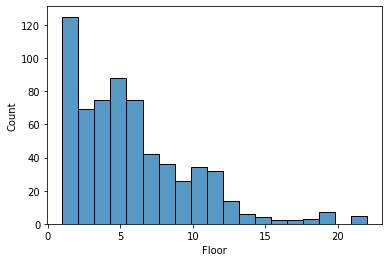

In [12]:
sns.histplot(df['Floor'])

In [16]:
df['Floor'].value_counts()

2     103
5      88
4      75
6      75
3      69
7      42
8      36
10     34
9      26
1      22
11     19
13     14
12     13
19      7
14      6
15      4
21      4
18      3
16      2
17      2
22      1
Name: Floor, dtype: int64

<AxesSubplot:xlabel='TotalFloor', ylabel='Count'>

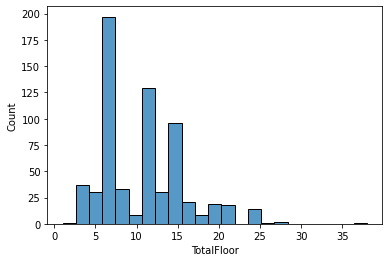

In [21]:
sns.histplot(df['TotalFloor'])

In [22]:
df['TotalFloor'].value_counts()

7     161
12    113
14     68
4      36
6      36
9      30
5      30
13     30
15     28
21     18
19     17
11     16
16     13
25     10
17      8
18      8
10      8
24      4
8       3
20      2
27      2
3       1
38      1
26      1
1       1
Name: TotalFloor, dtype: int64

<AxesSubplot:xlabel='Bedroom', ylabel='Count'>

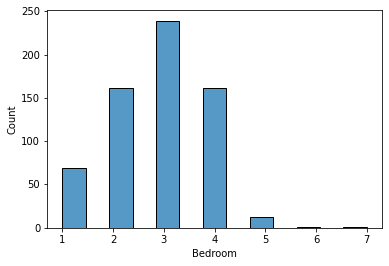

In [14]:
sns.histplot(df['Bedroom'])

In [15]:
df['Bedroom'].value_counts()

3    239
2    161
4    161
1     69
5     13
6      1
7      1
Name: Bedroom, dtype: int64

<AxesSubplot:xlabel='Bathroom', ylabel='Count'>

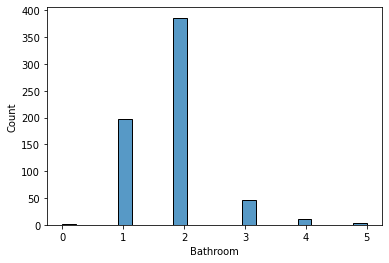

In [18]:
sns.histplot(df['Bathroom'])

In [20]:
df['Bathroom'].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

In [25]:
num_cols = [df.columns]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
x_cols = [col for col in df.columns if col != 'Price']
X = df[x_cols]
y = df['Price']

In [36]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.45639303, -1.01489712, -0.77234699, -0.82895634,  0.40269363,
         0.27691822],
       [ 0.79179777, -0.24204158, -0.77234699,  1.15132825,  0.40269363,
         0.27691822],
       [-0.50743429, -0.24204158, -0.77234699, -0.82895634,  0.40269363,
        -1.18711665],
       ...,
       [-1.02712711,  1.81890652,  0.62980285, -1.81909863, -1.76178464,
        -1.18711665],
       [ 0.23498403, -0.7572786 ,  0.62980285,  0.16118595,  0.40269363,
         0.27691822],
       [-0.19654662,  0.01557693, -0.77234699,  0.16118595,  0.40269363,
        -1.18711665]])

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=20)

In [51]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor

models = {
    'LR':LinearRegression(),
    'Ri':Ridge(alpha=1000),
    'La':Lasso(alpha=1000),
    'KNN':KNeighborsRegressor()
}

In [52]:
from sklearn.metrics import mean_absolute_error

mse_with_scaling = {}
adj_r2_with_scaling = {}

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    adj_r2_with_scaling[name] = round(model.score(x_test,y_test),3)
    mse_with_scaling[name] = mean_absolute_error(y_pred,y_test)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
mse_without_scaling = {}
adj_r2_without_scaling = {}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    adj_r2_without_scaling[name] = round(model.score(x_test,y_test),3)
    mse_without_scaling[name] = mean_absolute_error(y_test,y_pred)

In [55]:
print('Adjusted R-squared without Scaling:')
print(adj_r2_without_scaling)
print('Adjusted R-squared with scaling:')
print(adj_r2_with_scaling)

Adjusted R-squared without Scaling:
{'LR': 0.741, 'Ri': 0.738, 'La': 0.738, 'KNN': 0.747}
Adjusted R-squared with scaling:
{'LR': 0.686, 'Ri': 0.475, 'La': 0.69, 'KNN': 0.652}


In [56]:
print('MSE without Scaling:')
print(mse_without_scaling)
print('MSE with Scaling:')
print(mse_with_scaling)

MSE without Scaling:
{'LR': 14201.43067490021, 'Ri': 14445.11516958691, 'La': 14495.555161486396, 'KNN': 13607.463565891474}
MSE with Scaling:
{'LR': 16312.606858155452, 'Ri': 20053.5534091659, 'La': 16447.687733570787, 'KNN': 14664.071317829459}
